# Group: Parallel Powerhouse  

**Student ID: 20280115 & 20280107**

# ĐỒ ÁN CUỐI KỲ - SEAM CARVING

# 1. Mô tả bài toán
![Alt Text](https://www.abhinavsriram.com/assets/gif/seamcarve.gif)

**Thay Đổi Kích Thước Ảnh Một Cách Thông Minh:**
Seam carving giúp thay đổi kích thước ảnh một cách thông minh mà không làm biến dạng quá mức các đối tượng quan trọng trong ảnh. Điều này làm cho việc giảm kích thước hình ảnh trở nên hiệu quả hơn và duy trì được tỷ lệ và cân bằng trong hình.


**1.1. Tiềm năng và Ứng dụng thực tế của thuật toán Seam-Carving**

Tích Hợp trong Ứng Dụng Chỉnh Sửa Ảnh:

- Các ứng dụng chỉnh sửa ảnh có thể tích hợp thuật toán seam carving để cung cấp cho người dùng khả năng thay đổi kích thước hình ảnh một cách linh hoạt và hiệu quả.

- Adobe tích hợp thuật toán này vào chức năng trong Photoshop CS4, được gọi là Content Aware Scaling.

Cải Thiện Trải Nghiệm Xem Ảnh trên Thiết Bị Di Động:

- Seam carving có thể được sử dụng để tối ưu hóa hình ảnh cho các thiết bị di động, giúp cải thiện trải nghiệm xem ảnh trên màn hình nhỏ mà vẫn giữ được chất lượng và chi tiết.

Ứng Dụng Trong Mạng Xã Hội và Chia Sẻ Ảnh:

- Seam carving có thể hữu ích trong việc tối ưu hóa kích thước ảnh trước khi chia sẻ trên các nền tảng mạng xã hội, giúp tiết kiệm băng thông và tăng tốc quá trình tải ảnh.

Tính Hệ Thống trong Công Nghệ Dựa Trên GPU:

- Đối với ứng dụng yêu cầu xử lý ảnh nhanh chóng, seam carving có thể được triển khai trên GPU để tận dụng sức mạnh tính toán song song của GPU, đặc biệt là trong các dự án yêu cầu xử lý ảnh và video lớn.


**1.2. Mô tả Input-Output bài toán**

**Input:**

Hình Ảnh Gốc:

Một hình ảnh được đưa vào thuật toán để thực hiện việc seam carving. Hình ảnh có thể ở định dạng màu sắc hoặc grayscale.

Tham Số Kích Thước: Thông số scale cho biết mức độ giảm kích thước của hình ảnh theo chiều ngang.

**Output:**

Hình Ảnh Kết Quả: Hình ảnh sau khi được thực hiện seam carving với kích thước mới, đã được scale theo chiều ngang. Kích thước của hình ảnh đã được điều chỉnh dựa trên tham số đầu vào.


**1.3. Các bước thực hiện**

**B1.** Thực hiện GrayScale

**B2.** Tính ma trận năng lượng cho hình ảnh

**B3.** Tính bảng tổng giá trị của các đường Seam.

**B4.** Tìm đường Seam có năng lượng thấp nhất và loại bỏ

**B5.** Lặp lại các bước trên đến khi đạt được kích thước ảnh thỏa thông số Scale đầu vào









**To compile your file, you can use this command:** \
`nvcc tên-file.cu -o tên-file-chạy` \
***You can use Vietnamese to anwser the questions***

In [1]:
from numba import cuda
major, minor = cuda.get_current_device().compute_capability
print(f'GPU compute capability: {major}.{minor}')

GPU compute capability: 7.5


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Colab\ Notebooks/LTSS
!ls

/content/drive/MyDrive/Colab Notebooks/LTSS
exec  input  output  project_plan.jpg  public  seam_carving.ipynb  src


**Hàm hỗ trợ**

In [ ]:
import os
import cv2
from matplotlib import pyplot as plt

def show_imgs(file_paths = ['out_host.pnm', 'in.pnm']):
  plt.figure(figsize=(12, 10))
  for i, file_path in enumerate(file_paths):
    image = cv2.imread(f"./{file_path}", cv2.IMREAD_COLOR)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.subplot(2, 2, i + 1)
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.title(f'Image {file_path}')
  plt.show()

def computeError(img_name1, img_name2):
    image1 = cv2.imread(img_name1, cv2.IMREAD_COLOR)
    image2 = cv2.imread(img_name2, cv2.IMREAD_COLOR)
    a1 = image1.reshape((-1, 3))
    a2 = image2.reshape((-1, 3))

    err = 0
    for i in range(len(a1)):
        err += abs(int(a1[i][0]) - int(a2[i][0]))
        err += abs(int(a1[i][1]) - int(a2[i][1]))
        err += abs(int(a1[i][2]) - int(a2[i][2]))
    err /= (len(a1) * 3)
    return err


def run_all_seam_carving(cu_names, input_file_name = 'input1.pnm', scale_rate = 0.8):

  os.popen(f"nvcc -arch=sm_{major}{minor} src/print_device_info.cu -o exec/print_device_info.out").read()
  print(os.popen(f"./exec/print_device_info.out").read())
  print(f'Scale rate: {scale_rate}')

  imgs = [f'input/{input_file_name}']
  for cu_name in cu_names:

    print('-' * 50)
    print(f'{cu_name} excution')

    os.popen(f"nvcc -arch=sm_{major}{minor} src/{cu_name}.cu -o exec/{cu_name}.out").read()
    result_execute = os.popen(f"./exec/{cu_name}.out input/{input_file_name} output/{cu_name}.pnm {scale_rate}").read()
    print(result_execute)

    imgs.append(f'output/out_{cu_name}.pnm')

  show_imgs(imgs)
  print('-' * 50)
  if 'host' in cu_names and len(cu_names) > 1:
    device_imgs = [f"output/out_{cu_name}.pnm" for cu_name in cu_names if cu_name != 'host']
    for device_img in device_imgs:
      err = computeError('output/out_host.pnm', device_img)
      print(f"\nError between host and {device_img}: {err}")

# 2. Phiên bản tuần tự

**2.1. Mô tả cài đặt**

**B1.** Thực hiện GrayScale
- `convertRgb2Gray`: hàm thực hiện chuyển ma trận ảnh RGB về ma trận ảnh xám

**B2.** Tính ma trận năng lượng cho hình ảnh
- `generateEnergyMatrix`: hàm thực hiện tạo ra ma trận năng lượng (dùng edge detection). Đầu vào là ảnh xám và tạo ra ma trận năng lượng với mỗi pixel tương ứng trên ảnh xám thì trên ma trận năng lượng sẽ là năng lượng của pixel đó.

**B3.** Tính bảng tổng giá trị của các đường Seam.
- `generateSeams`: hàm sinh ra các đường seam. Đầu vào là ma trận năng lượng, đầu ra là ma trận chứa tổng năng lượng sao cho tổng năng lượng tại mỗi pixel luôn nhỏ nhất và ma trận lưu truy vết. Sử dụng Dynamic Programming để tối ưu, ý tưởng là duyệt từng dòng, tại mỗi pixel sẽ tìm xem ai là parent ([i - 1, j], [i - 1, j - 1], [i - 1, j + 1]) đang có tổng năng lượng nhỏ nhất thì cập nhật năng lượng tổng tại pixel bằng năng lượng tại pixel đó + năng lượng của parent. Cuối cùng ta được hàng cuối cùng sẽ chứa danh sách các tổng năng lượng thấp nhất và từ đó thực hiện truy vết ở bước sau.

**B4.** Tìm đường Seam có năng lượng thấp nhất và loại bỏ
- `getSmallestSeam`: hàm tìm đường seam có tổng năng lượng thấp nhất. Ý tưởng là từ hàng cuối cùng, tìm vị trí có tổng thấp nhất và truy vết ngược lên sau đó lưu đường truy vết đó sẽ có đường seam cần tìm.
- `removeSeam`: hàm xoá đường seam khỏi ma trận. Ý tưởng là khởi tạo hash_map để đánh dấu các vị trí sẽ bị loại bỏ, sau đó tạo ma trận ảnh mới và copy các vị trí mà không bị đánh dấu, sau đó copy ngược lại cho mảng input ban đầu.


**B5.** Lặp lại các bước trên đến khi đạt được kích thước ảnh thỏa thông số Scale đầu vào

**2.2. Biên dịch code**

In [ ]:
!nvcc -arch=sm_{major}{minor} src/host.cu -o src/host.out
!./src/host.out input/input1.pnm output/out.pnm 0.6


Input image size (width x height): 274 x 186
Output image size (width x height): 164 x 186

Run time: 508.849915 ms


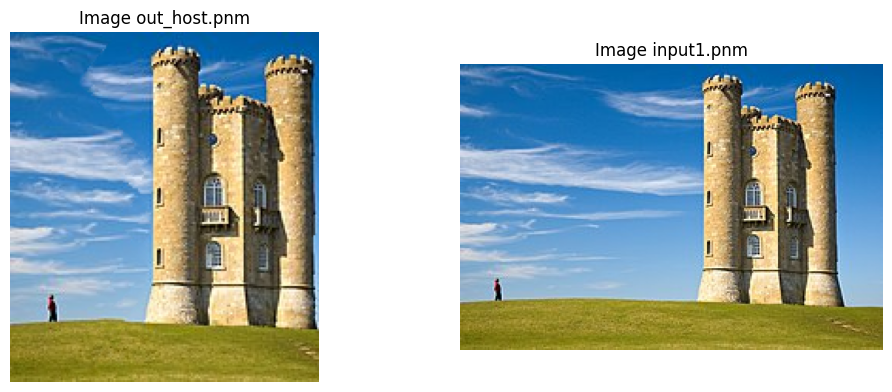

In [ ]:
show_imgs(['out_host.pnm', 'input1.pnm'])

**2.3. Đánh giá**

Khi thực hiện thuật toán trên với mức scale 0.6 thì 40% ảnh theo chiều ngang đã được xoá đi mà vẫn giữ lại được đối tượng chủ thể chính. Tuy nhiên thời gian thực thi khá lâu đặc biệt là với các ảnh có kích thước lớn và mức scale thấp.

# 3. Phiên bản song song 1 (device)

**2.1. Phân tích**

Thuật toán trên ta dễ dàng nhận thấy các tác vụ chuyển ảnh từ RGB thành gray, và thực hiện apply kernel edge detection để sinh ra ma trận năng lượng là những bài toán phổ biến của việc áp dụng song song trong GPU nên có thể sử dụng để áp dụng ngay cho bài toán này.

Trong thuật toán seam carving tại phần sinh ra tổng năng lượng thấp nhất các đường seam cũng có thể tính toán để chạy song song, tuy nhiên vì khi tính kết quả của 1 hàng bất kỳ, ta cần kết qủa của hàng ở phía trên nó, nên việc này cần xem xét kĩ lưỡng.

In [ ]:
!nvcc -arch=sm_{major}{minor} src/host.cu -o exec/host.out
!./exec/host.out input/input1.pnm output/out.pnm 0.6 calTimeForAnalysis


Input image size (width x height): 274 x 186
Output image size (width x height): 164 x 186

Convert RGB to gray run time: 33.014496 ms
Gengerate energy matrix run time: 375.734039 ms
Generate all seams run time: 71.828407 ms
Find smallest seam and remove run time: 15.547840 ms

Toal run time: 500.168060 ms


Thời gian đánh giá ta thấy được tác vụ tạo ma trận năng lượng chiếm nhiều thời gian nhất (cần ưu tiên tối ưu), bên cạnh đó là tác vụ tạo ra ma trận các tổng năng lượng của các seam cũng chiếm thời gian tương đối.

**2.2. Thiết kế**

**Áp dụng song song trên GPU cho các tác vụ:**

- `Convert ảnh RGB -> Xám`
- `Tạo ma trận năng lượng`
- `Tạo ra ma trận tổng năng lượng của các đường seam`

**2.3. Khởi tạo**

- `Convert ảnh RGB -> Xám`: mỗi pixel là độc lập nên ta có thể dễ dàng áp dụng cho mỗi thread sẽ thực hiện việc tính toán convert RGB sang grayscale.
- `Tạo ma trận năng lượng`: Mỗi pixel là độc lập nên ta có thể cho mỗi thread thực hiện tính toán nhân với kernel
- `Tạo ra ma trận tổng năng lượng của các đường seam`: như đã phân tích thì để tính một dòng cần kết qủa của dòng ở phía trên nó, nên ta sẽ thực hiện song song tuần tự theo từng dòng từ trên xuống. với mỗi dòng sẽ thực hiện song song với số thread được tính toán với độ dài của dòng. mỗi thread sẽ thực hiện tính toán tại pixel tương ứng là tìm parent và cập nhật lại vào ma trận tổng năng lượng.


**2.4. Đánh giá**

**********GPU info**********
Name: Tesla T4
Compute capability: 7.5
Num SMs: 40
Max num threads per SM: 1024
Max num warps per SM: 32
GMEM: 15835660288 bytes
CMEM: 65536 bytes
L2 cache: 4194304 bytes
SMEM / one SM: 65536 bytes
****************************

Scale rate: 0.6
--------------------------------------------------
host excution

Input image size (width x height): 274 x 186
Output image size (width x height): 164 x 186

Run time: 512.563599 ms

--------------------------------------------------
device excution

Input image size (width x height): 274 x 186
Output image size (width x height): 164 x 186

Run time: 236.638077 ms



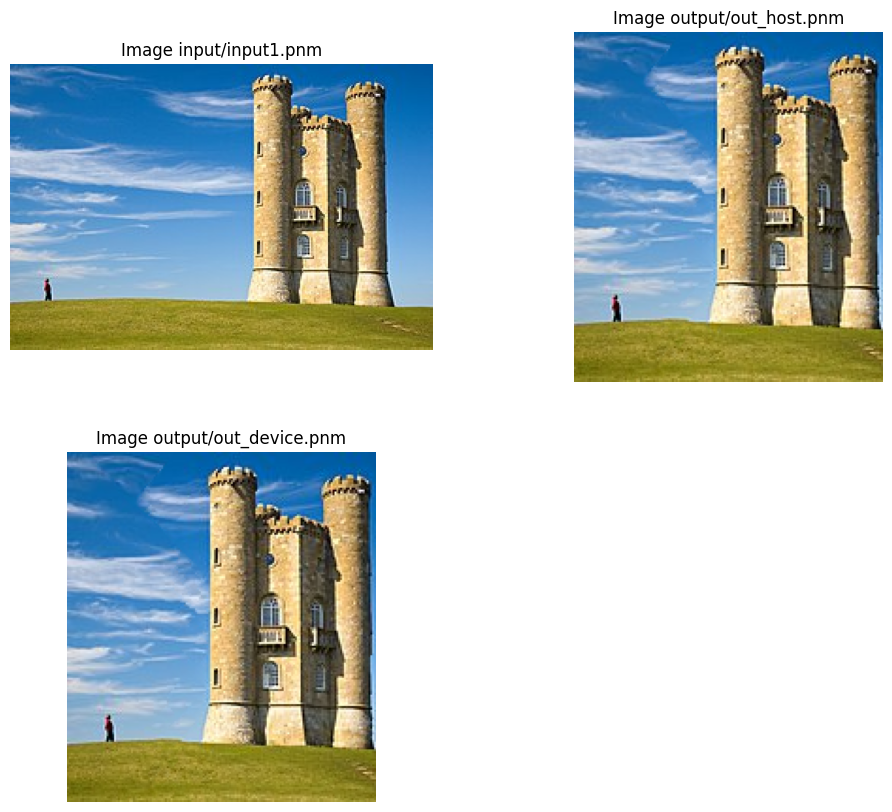

--------------------------------------------------

Error between host and output/out_device.pnm: 0.0


In [ ]:
cu_names = ['host',
            'device']

run_all_seam_carving(cu_names, scale_rate = 0.6)

**Đánh giá**

Với mức scale 0.6 thì 40% ảnh theo chiều ngang đã bị xoá đi tuy nhiên vẫn giữ lại chủ thể chính của ảnh. Thời gian thực hiện toàn bộ thực toán seam carving đã giảm rõ rệt. Thực hiện phép đo sai số giữa phiên bản host và device ta được kết quả 0.0 tức là phiên bản song song trên gpu chạy ra kết quả tương tự 100% với kết quả của phiên bản tuần tự.

Việc áp dụng song song trên các tác vụ chuyển ảnh sang xám, tính toán ma trận năng lượng và tìm các đường seam đã đạt hiệu quả như mong muốn.

# 3. Phiên bản song song 2 (device_optimize_v1)

**2.1. Phân tích**

Áp dụng các kiến thức đã học có thể áp dụng thêm dùng các bộ nhớ CMEM, SMEM cho các kernel song song để tối ưu hoá.

**2.2. Thiết kế**

Áp dụng thêm dùng CMEM để lưu filter bởi vì giá trị của filter không thay đổi trong suốt chương trình.

Sử dụng SMEM để tối ưu truy xuất dữ liệu và tính toán cho các tác vụ generateEnergyMatrixKernel, generateSeam.



**2.3. Khởi tạo**
- `Tạo ma trận năng lượng`: thay thế các filter cũ thành CMEM filter. Áp dụng SMEM để tính toán, ban đầu ta cần copy dữ liệu bộ nhớ SMEM, tuy nhiên cần lưu ý phải copy cả các phần dữ liệu ở ngoài rìa có block (một khoảng bằng FILTER_WIDTH / 2) để có thể apply nhân tích chập với filter. Đợi các thread thực thi xong việc copy dữ liệu SMEM bằng __syncthreads() ta có thể sử dụng SMEM và tính toán như bình thường.

- `Tạo ra ma trận tổng năng lượng của các đường seam`: Áp dụng SMEM để lưu dữ liệu tại toàn bộ dòng đang xét, sau đó đợi các thread cùng copy dữ liệu xong, truy xuất dữ liệu từ SMEM để sử dụng.



**********GPU info**********
Name: Tesla T4
Compute capability: 7.5
Num SMs: 40
Max num threads per SM: 1024
Max num warps per SM: 32
GMEM: 15835660288 bytes
CMEM: 65536 bytes
L2 cache: 4194304 bytes
SMEM / one SM: 65536 bytes
****************************

Scale rate: 0.6
--------------------------------------------------
host excution

Input image size (width x height): 274 x 186
Output image size (width x height): 164 x 186

Run time: 487.425018 ms

--------------------------------------------------
device_optimize_v1 excution

Input image size (width x height): 274 x 186
Output image size (width x height): 164 x 186
Block size: (32, 32)

Run time: 214.194305 ms



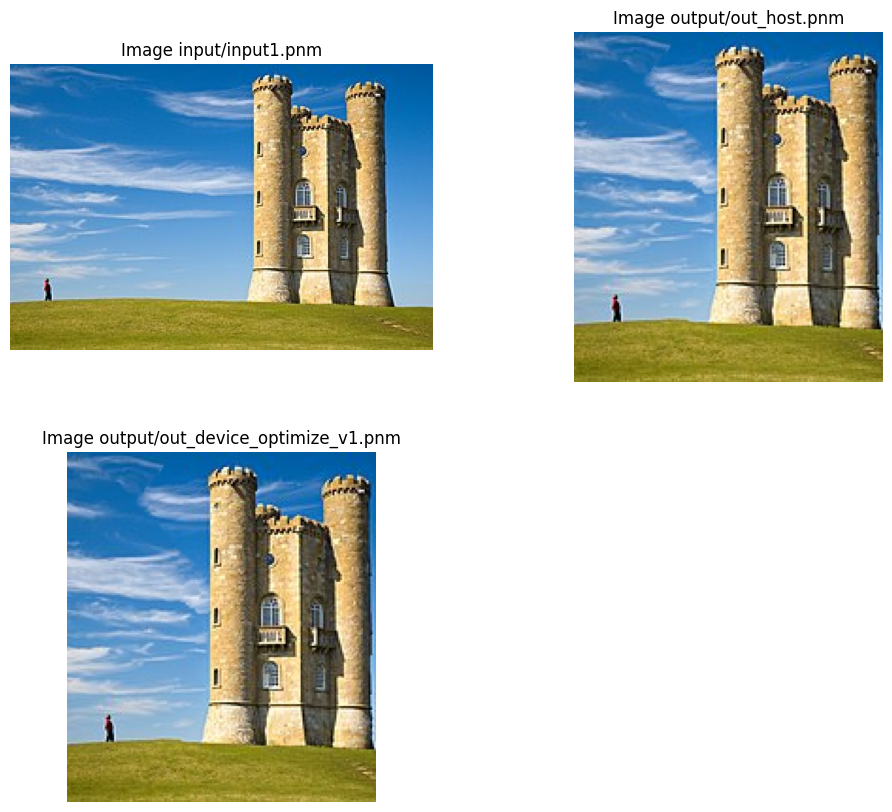

--------------------------------------------------

Error between host and output/out_device_optimize_v1.pnm: 0.0


In [ ]:
cu_names = ['host',
            'device_optimize_v1']

run_all_seam_carving(cu_names, scale_rate = 0.6)

**Đánh giá**

Với mức scale 0.6 thì 40% ảnh theo chiều ngang đã bị xoá đi tuy nhiên vẫn giữ lại chủ thể chính của ảnh. Và đạt được sai số với phiên bản host cũng là 0.0

Thời gian thực hiện toàn bộ thực toán seam carving khi áp dụng SMEM và CMEM đã được giảm so với phiên bản cài đặt song song ban đầu.

Đánh giá đối với tác vụ tạo ma trận năng lượng, việc sử dụng SMEM và CMEM đạt hiểu quả tốt do cần truy xuất dữ liệu và tính toán nhiều. Đối với tác vụ tạo ra ma trận tổng năng lượng của các đường seam việc sử dụng SMEM không đáng kể khi mà mỗi pixel chỉ dùng SMEM một lần để truy xuất dữ liệu.


# 4. Nhìn lại tất cả các phiên bản

**********GPU info**********
Name: Tesla T4
Compute capability: 7.5
Num SMs: 40
Max num threads per SM: 1024
Max num warps per SM: 32
GMEM: 15835660288 bytes
CMEM: 65536 bytes
L2 cache: 4194304 bytes
SMEM / one SM: 65536 bytes
****************************

Scale rate: 0.6
--------------------------------------------------
host excution

Input image size (width x height): 711 x 400
Output image size (width x height): 426 x 400

Run time: 12394.373047 ms

--------------------------------------------------
device excution

Input image size (width x height): 711 x 400
Output image size (width x height): 426 x 400

Run time: 1721.238281 ms

--------------------------------------------------
device_optimize_v1 excution

Input image size (width x height): 711 x 400
Output image size (width x height): 426 x 400
Block size: (32, 32)

Run time: 1406.694702 ms



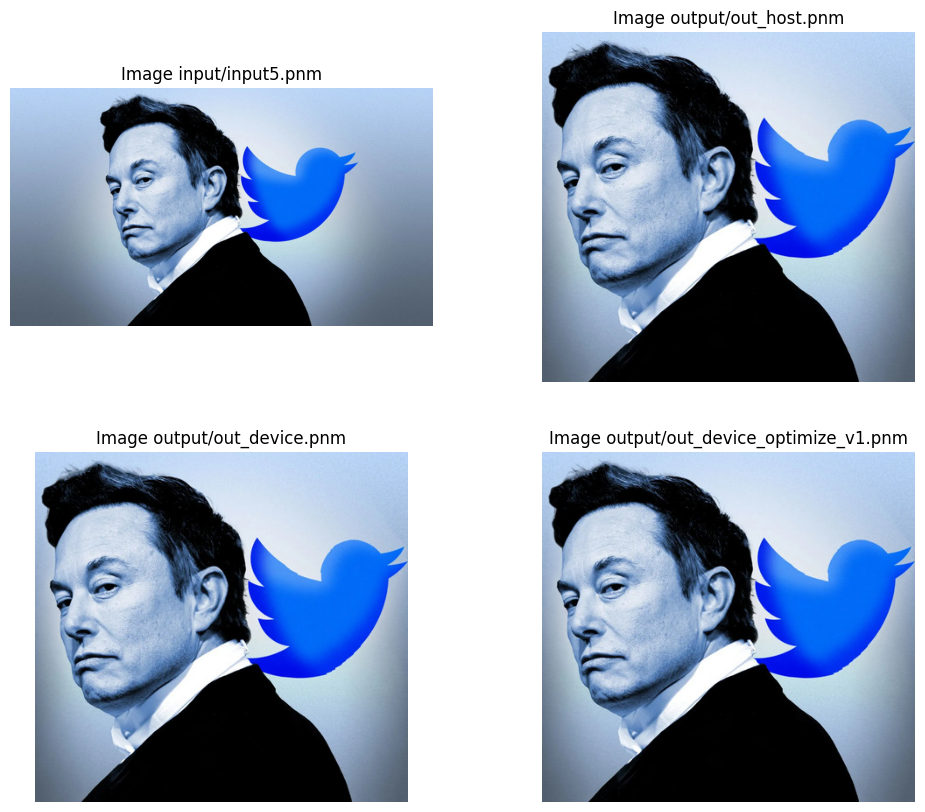

--------------------------------------------------

Error between host and output/out_device.pnm: 0.0

Error between host and output/out_device_optimize_v1.pnm: 0.0


In [ ]:
cu_names = ['host',
            'device',
            'device_optimize_v1']

run_all_seam_carving(cu_names, scale_rate = 0.6, input_file_name = 'input5.pnm')

**********GPU info**********
Name: Tesla T4
Compute capability: 7.5
Num SMs: 40
Max num threads per SM: 1024
Max num warps per SM: 32
GMEM: 15835660288 bytes
CMEM: 65536 bytes
L2 cache: 4194304 bytes
SMEM / one SM: 65536 bytes
****************************

Scale rate: 0.5
--------------------------------------------------
host excution

Input image size (width x height): 600 x 400
Output image size (width x height): 300 x 400

Run time: 8186.618164 ms

--------------------------------------------------
device excution

Input image size (width x height): 600 x 400
Output image size (width x height): 300 x 400

Run time: 1495.408691 ms

--------------------------------------------------
device_optimize_v1 excution

Input image size (width x height): 600 x 400
Output image size (width x height): 300 x 400
Block size: (32, 32)

Run time: 1277.730713 ms



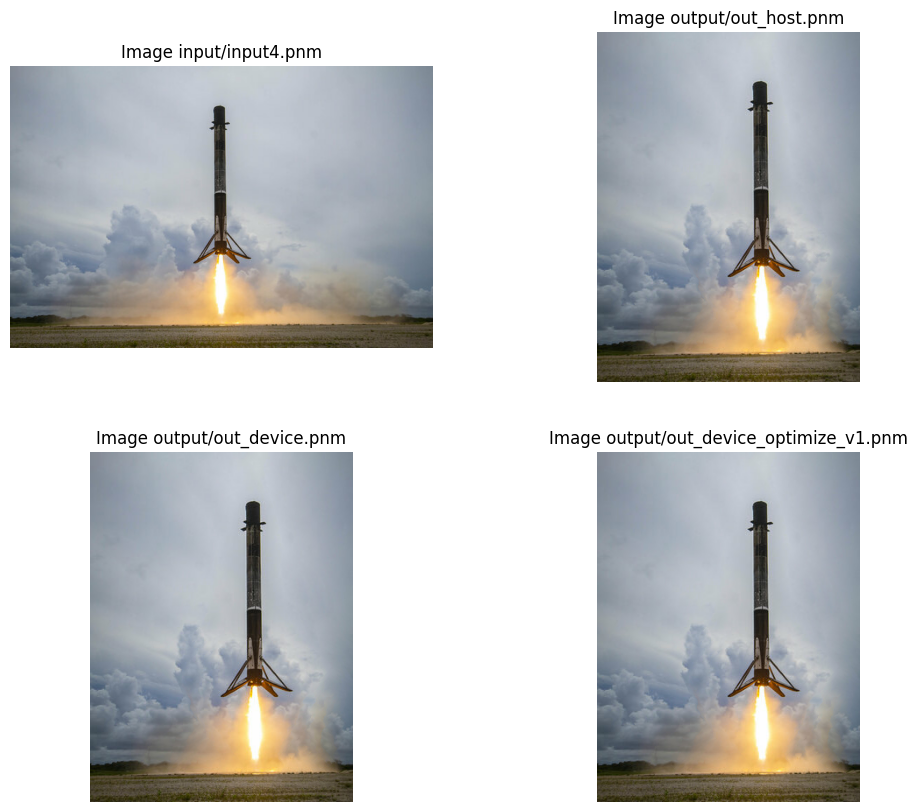

--------------------------------------------------

Error between host and output/out_device.pnm: 0.5509638888888889

Error between host and output/out_device_optimize_v1.pnm: 0.5509638888888889


In [ ]:
cu_names = ['host',
            'device',
            'device_optimize_v1']
run_all_seam_carving(cu_names, scale_rate = 0.5, input_file_name = 'input4.pnm')

# 5. Nhìn lại quá trình làm project

**Khó khăn**:
- Thuật toán seam carving là một thuật toán rất thú vị, và cũng là lần đầu nhóm tiếp cận nên có nhiều kiến thức mới và cần tìm hiểu.

- Áp dụng tổng hợp các kiến thức từ các lab trước vào bài toán này.

- Khi triển khai code trên GPU chương trình khá dài và với môi trường code và biên dịch cũng khó khăn trong việc debug.

- Phụ thuộc vào colab và google drive, cũng như phải liên tục đổi tài khoản google để tránh limit GPU của colab,  nên không thể sử dụng version control system như git để quản lý code trong quá trình làm việc nhóm.

**Học hỏi được gì**:
- Tìm hiểu được một thuật toán mới và có nhiều ứng dụng trong cuộc sống.

- Tìm hiểu được khả năng tính toán song song mạnh mẽ của GPU.

- Quy trình tối ưu và phát triển một ứng dụng từ những bước ban đầu và cải tiến dần.

- Có thêm một tư duy mới trong việc thực hiện một bài toán bất cụ thể, liệu bài toán có thể song song không? song song với GPU được những phần nào? Đấy chắc chắn là những câu hỏi mà nhóm có thể suy nghĩ tới trong tương lai khi gặp những bài toán khó.

**Phát triển thêm**:
- Chưa tối ưu được song song phần remove seam, trong tương lai nhóm sẽ nghiên cứu để hoàn thiện.

- Tích hợp lên một webapp để mọi người có thể sử dụng.

- Làm video tiktok để chia sẻ kiến thức với mọi người về bài toán này nói riêng, và song song trên GPU nói chung.

# 6. Tham khảo (Tài liệu)

https://vnoi.info/wiki/cs/imageprocessing/Seam-Carving.md
https://github.com/kalpeshdusane/Seam-Carving-B.E.-Project